# Task: Decision Tree on the MNIST dataset

Mimic the steps in the iris example. Use a decision tree again to train a classification model to identify handwritten digits using the popular MNIST dataset.

In [19]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scikit-learn pandas seaborn

from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Data Acquisition and Preprocessing
The MNIST data is acquired from openml, but in order not to go out to the Internet frequently, we download it and bring it into our preferred form of a variable X and a variable y and save it in well-named numpy files. If these files exist, we just load the preprocessed data from disk.


In [ ]:
X = None
y = None

# Aquire data
if not os.path.exists("data/mnist_X.npy"):
    print("Acquiring and preprocessing")

    if not os.path.exists("data"):
        os.mkdir("data")  # create dir if not exists

    mnist = fetch_openml("mnist_784")
    X = mnist.data.astype(
        np.uint8
    )  # these have been grayscale in floating point, now 0 .. 255
    y = [int(x) for x in mnist.target]  # targets have been strings
    np.save("data/mnist_X.npy", X)
    np.save("data/mnist_y.npy", y)

# Load data
X = np.load("data/mnist_X.npy")
y = np.load("data/mnist_y.npy")

## Show a few random images

Be wise. Your data loading code will be wrong in the beginning. Whenever you train a model, at least glimpse on the soundness of the model input. A random plot is a good start. Here, the title is the class and the image is just the image

[41149 43983 38970 58683 52620 48711]


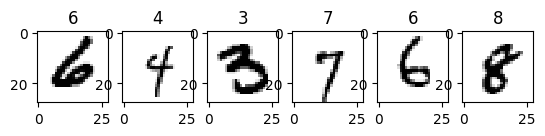

In [15]:
# show a random image
vis = np.random.choice(range(X.shape[0]), size=6)
print(vis)

for i, j in enumerate(vis):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[j].reshape(28, 28), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(y[j])

## Train Test Split
Data Mining requires a training set to find model paramaeters and a test set to estimate performance on unseen data. These two datasets can be created for MNIST by using just random splits as provided by `train_test_split` in skicit-learn 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)  # 70% data for training, 30% data for testing
print("# data points for training:", len(X_train))
print("# data points for training:", len(X_test))

# data points for training: 49000
# data points for training: 21000


## Train the Classifier

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluate the classifier

In [18]:
# get estimation from the trained model (dtc)
pred_train = dtc.predict(X_train)
pred_test = dtc.predict(X_test)
# obtain accuracy
print(classification_report(pred_test, y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2053
           1       0.96      0.94      0.95      2445
           2       0.84      0.85      0.84      2068
           3       0.84      0.83      0.84      2104
           4       0.86      0.86      0.86      2065
           5       0.83      0.83      0.83      1915
           6       0.88      0.89      0.89      2047
           7       0.90      0.89      0.90      2212
           8       0.80      0.82      0.81      2004
           9       0.83      0.82      0.83      2087

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



# Conclude
This seems tos how that a Decision tree is reaching 87% on average, quite good, but not good enough. This is where Deep Learning will bring a real boost.